# Customer Segmentation using Clustering
by Wilmer Garzón on 15-July-2025.

- This notebook demonstrates unsupervised learning techniques for customer segmentation.
- We will apply clustering algorithms such as **K-Means** and **DBSCAN**
- Evaluate their performance using the **Silhouette Score**.

## Dataset Description:
- *Mall_Customers.csv*; [DataSet](https://github.com/tanishq21/Mall-Customers/blob/main/Mall_Customers.csv).
- The dataset contains demographic and behavioral data about customers of a shopping mall.
- It is commonly used for customer segmentation tasks in unsupervised learning, particularly clustering.

Dataset Features:

| Column Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| CustomerID             | Unique identifier for each customer                                         |
| Genre                  | Gender of the customer (Male or Female)                                     |
| Age                    | Age of the customer (in years)                                              |
| Annual Income (k$)     | Annual income of the customer (in thousands of dollars)                     |
| Spending Score (1-100) | Score assigned by the mall based on customer behavior and spending patterns |

## Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

/home/wilmer/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Load the Dataset

In [ ]:
# Load the dataset (ensure 'Mall_Customers.csv' is in the same directory)
df = pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [ ]:
# Basic info and statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

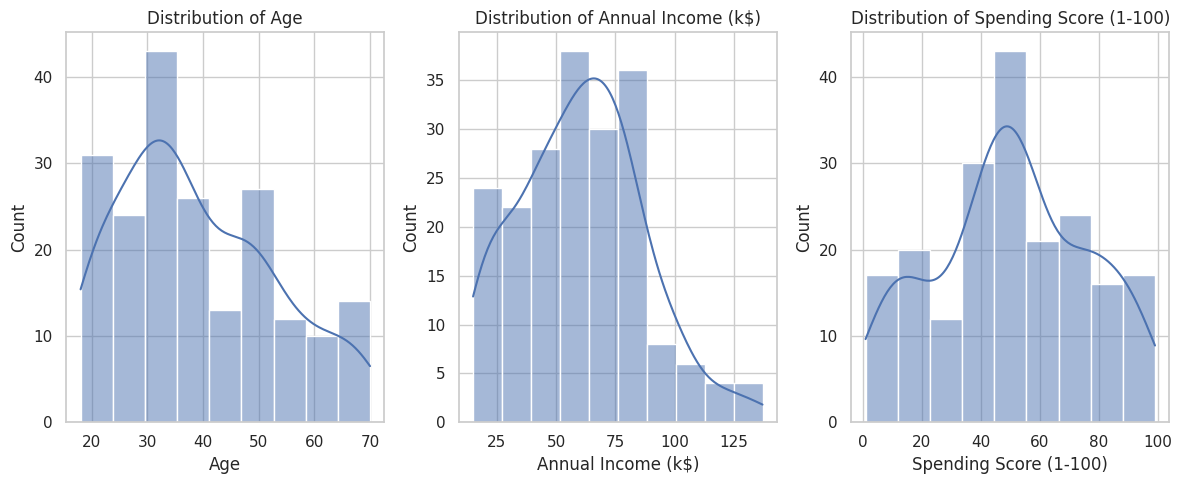

In [ ]:
# Visualize distributions
plt.figure(figsize=(12, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow Method
It is a technique used to determine the optimal number of clusters (K) in K-Means clustering.
1. Running K-Means for a range of K values.
2. Plotting the inertia (within-cluster sum of squares) against K.
3. Identifying the "elbow point" where the rate of decrease sharply slows down. This point suggests a good balance between model complexity and performance.

It helps avoid overfitting by selecting a K that captures structure without unnecessary complexity.

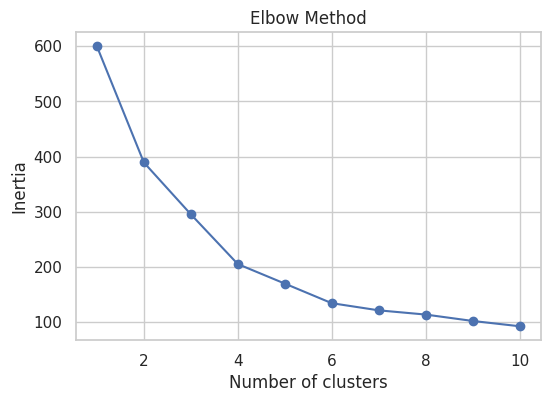

In [ ]:
# Elbow method to find optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## K-Means Clustering
It is used to group data into K distinct clusters based on feature similarity. It works by:

1. Randomly initializing K centroids.
2. Assigning each data point to the nearest centroid.
3. Updating centroids based on the mean of assigned points.
4. Repeating steps 2–3 until convergence.
   
The goal is to minimize the within-cluster variance, making each cluster as compact and distinct as possible.

In [ ]:
# Fit KMeans with optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['KMeans_Cluster'] = labels_kmeans

## PCA (Principal Component Analysis)
- PCA is a dimensionality reduction technique that transforms high-dimensional data into a smaller number of principal components while preserving as much variance as possible.
- It helps simplify data, reduce noise, and improve visualization.
- PCA is often used to project data into 2D or 3D for easier interpretation

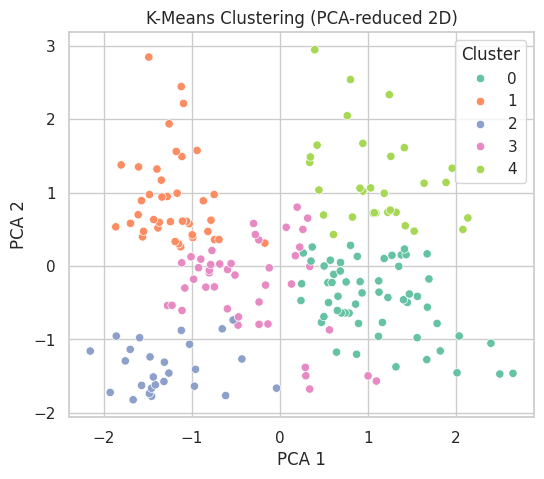

In [ ]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_kmeans, palette='Set2')
plt.title('K-Means Clustering (PCA-reduced 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

### Silhouette Score Interpretation
The Silhouette Score ranges from -1 to 1:
- **+1**: *Perfect clustering*: points are well matched to their own cluster and far from others.
- **0**: *Overlapping clusters*: points are on or very close to the decision boundary between clusters.
- **-1**: *Poor clustering*: points may be assigned to the wrong cluster.

In [ ]:
# Evaluate KMeans clustering
score_kmeans = silhouette_score(X_scaled, labels_kmeans)
print(f'Silhouette Score for KMeans: {score_kmeans:.3f}')

Silhouette Score for KMeans: 0.408


**What does 0.408 mean?**
- A score of 0.408 suggests that the clusters are somewhat well-formed, but not very distinct.
- There is some overlap or ambiguity between clusters.
- It’s a reasonable result for real-world data, especially when using only a few features

## DBSCAN Clustering
DBSCAN is a density-based clustering algorithm that groups together points that are closely packed and labels points in low-density regions as outliers.

In [ ]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to dataframe
df['DBSCAN_Cluster'] = labels_dbscan


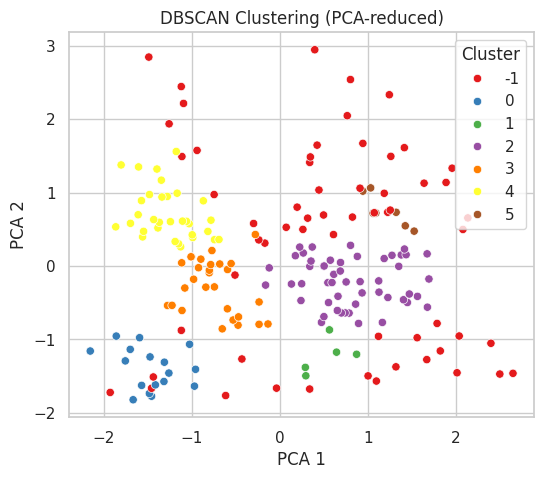

In [ ]:
# Visualize DBSCAN clusters
plt.figure(figsize=(6, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_dbscan, palette='Set1')
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Evaluate DBSCAN clustering (ignore noise points labeled as -1)
mask = labels_dbscan != -1
if len(set(labels_dbscan[mask])) > 1:
    score_dbscan = silhouette_score(X_scaled[mask], labels_dbscan[mask])
    print(f'Silhouette Score for DBSCAN: {score_dbscan:.3f}')
else:
    print("DBSCAN did not find enough clusters to compute Silhouette Score.")

Silhouette Score for DBSCAN: 0.482


## Conclusion
- We applied **K-Means** and **DBSCAN** clustering algorithms to segment mall customers based on their age, income, and spending score.
- We visualized the clusters using PCA and evaluated the clustering quality using the **Silhouette Score**.
- This exercise demonstrates how unsupervised learning can be used for customer segmentation and business insights.